# Introduction to DBSCAN


Let's briefly explore visually the differences between DBSCAN and other clustering techniques, such as K-Means Clustering.

## DBSCAN and Clustering Examples

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
blobs = pd.read_csv('data/cluster_blobs.csv')

In [9]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<Axes: xlabel='X1', ylabel='X2'>

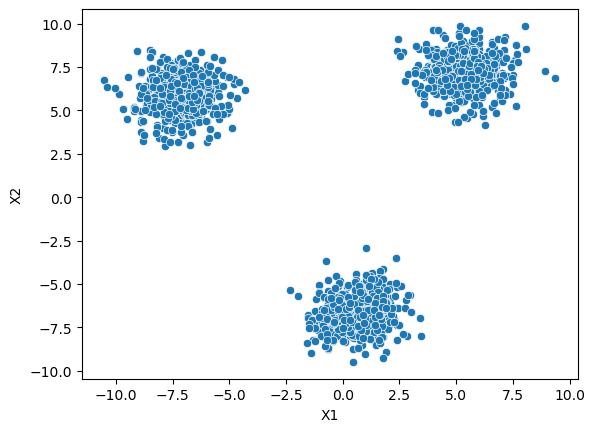

In [11]:
sns.scatterplot(data=blobs,x='X1',y='X2')

In [17]:
moons = pd.read_csv('data/cluster_moons.csv')

In [19]:
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


<Axes: xlabel='X1', ylabel='X2'>

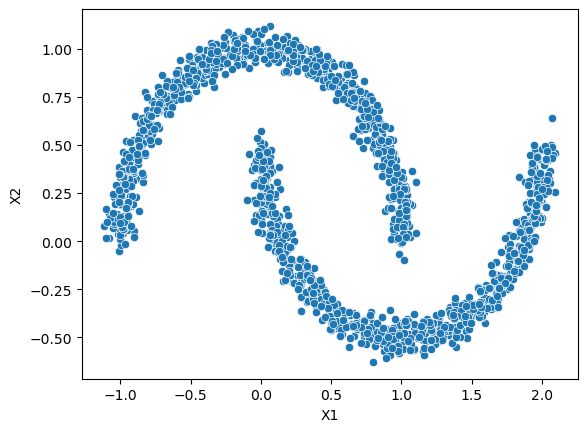

In [21]:
sns.scatterplot(data=moons,x='X1',y='X2')

In [25]:
circles = pd.read_csv('data/cluster_circles.csv')

In [27]:
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


<Axes: xlabel='X1', ylabel='X2'>

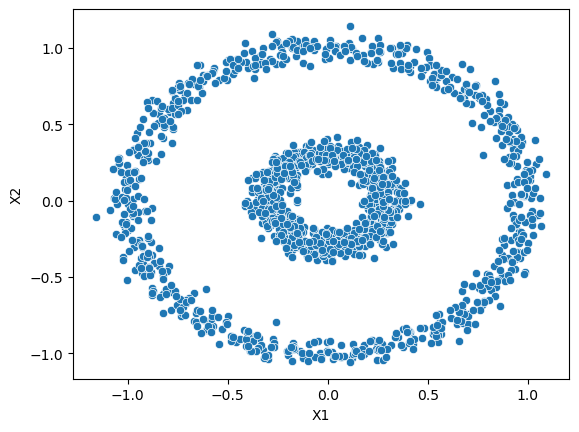

In [29]:
sns.scatterplot(data=circles,x='X1',y='X2')

## Label Discovery

In [32]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

## Kmeans Results

In [35]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2)

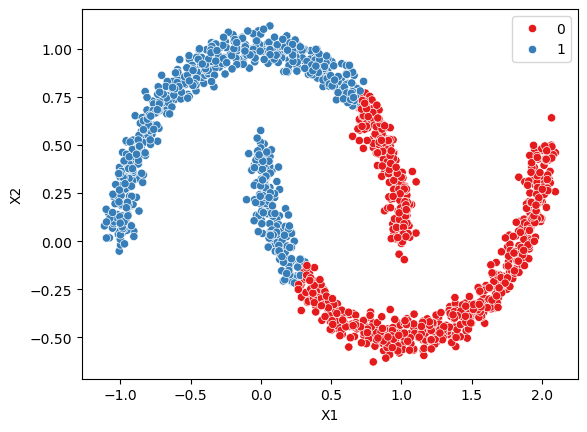

In [36]:
display_categories(model,moons)

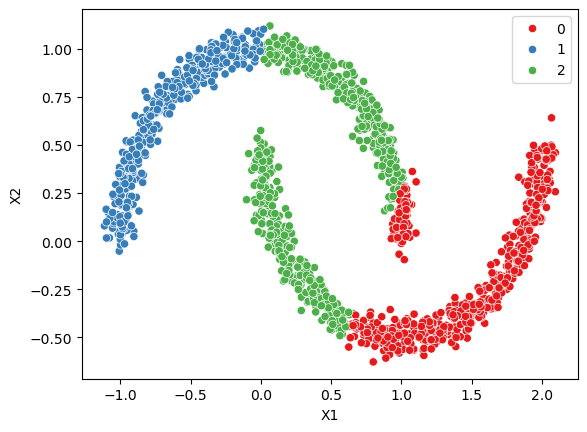

In [39]:
model = KMeans(n_clusters = 3)
display_categories(model,moons)

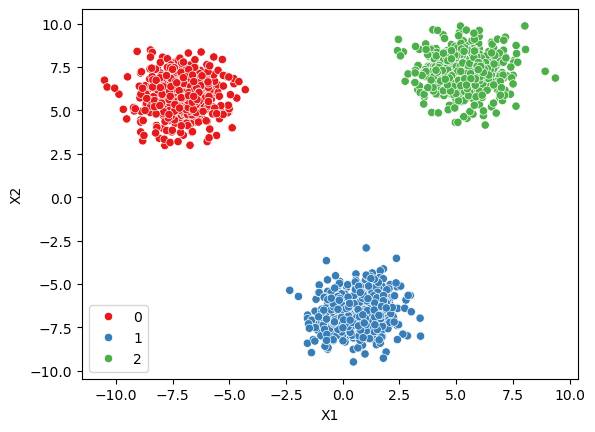

In [41]:
model = KMeans(n_clusters = 3)
display_categories(model,blobs)

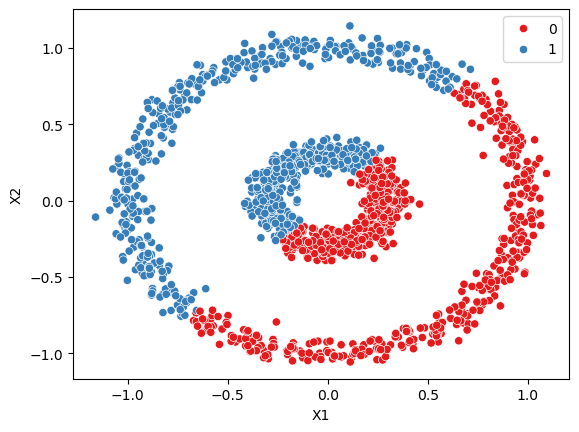

In [43]:
model = KMeans(n_clusters = 2)
display_categories(model,circles)

## DBSCAN Results

In [46]:
from sklearn.cluster import DBSCAN

In [48]:
model = DBSCAN(eps=0.6)

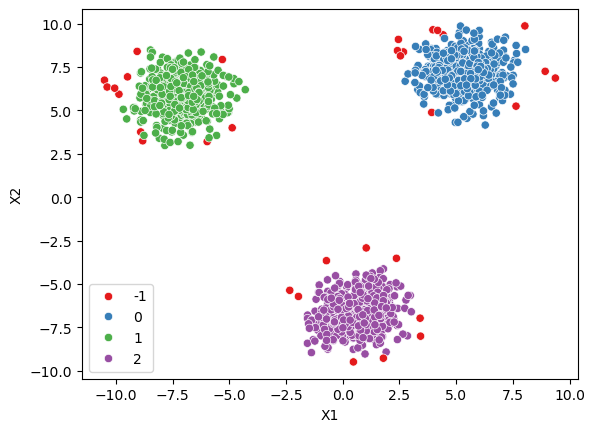

In [50]:
# -1 kluser are the outliers points 
display_categories(model,blobs)

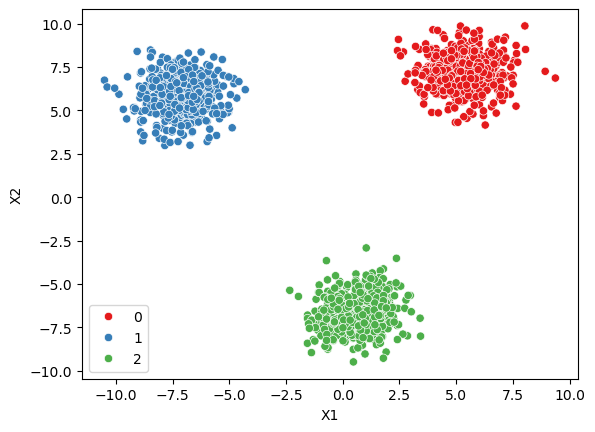

In [52]:
model = DBSCAN(eps=2)
display_categories(model,blobs)

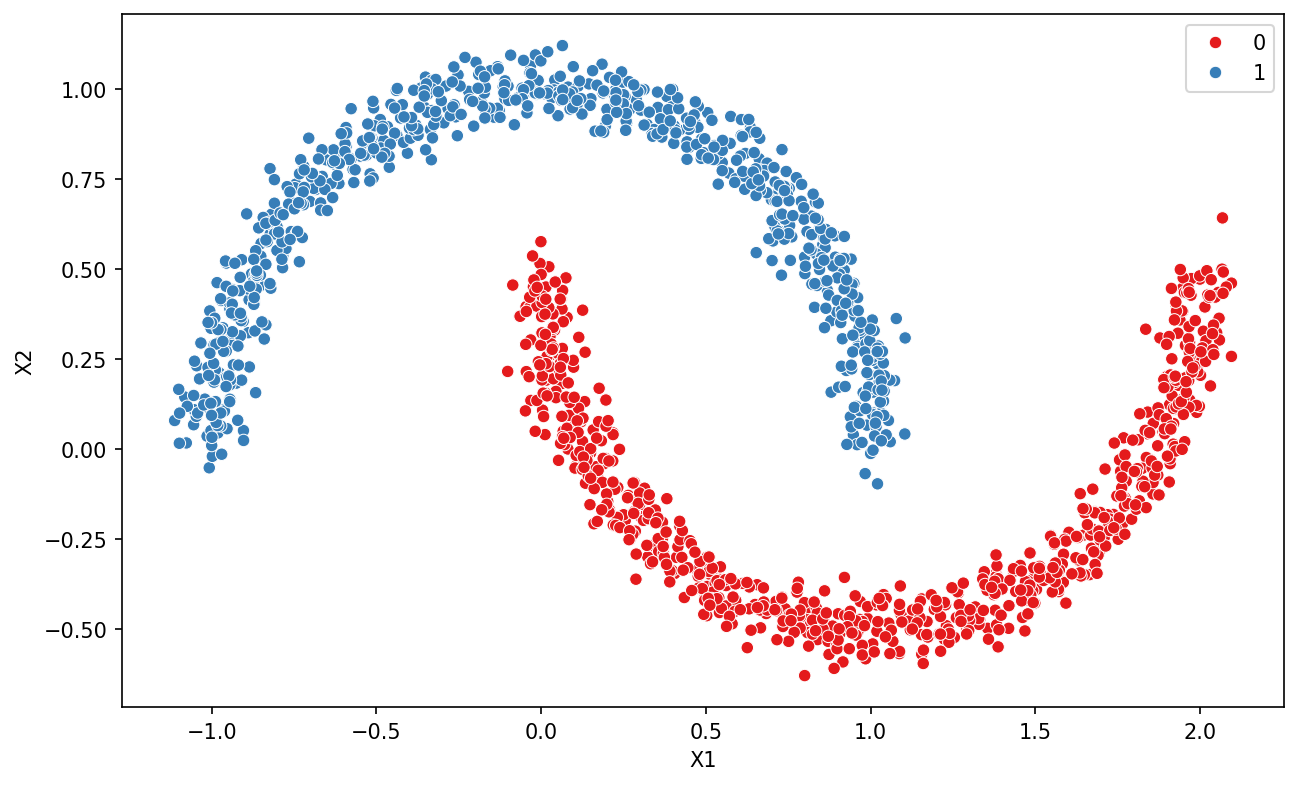

In [54]:
model = DBSCAN(eps=0.15)
plt.figure(figsize=(10,6),dpi=150)
display_categories(model,moons)

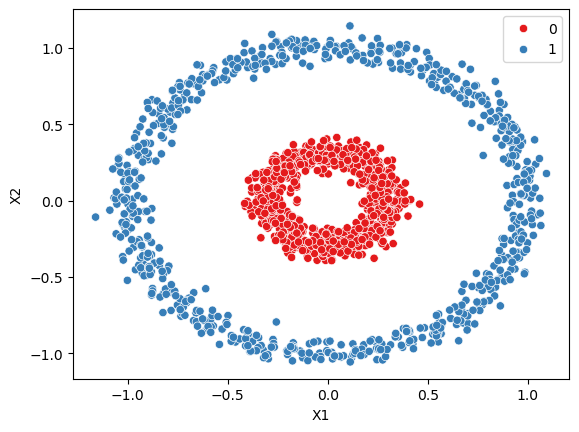

In [56]:
display_categories(model,circles)

### Let's explore the hyperparameters for DBSCAN and how they can change results!

In [64]:
two_blobs = pd.read_csv('data/cluster_two_blobs.csv')
two_blobs_outliers = pd.read_csv('data/cluster_two_blobs_outliers.csv')

<Axes: xlabel='X1', ylabel='X2'>

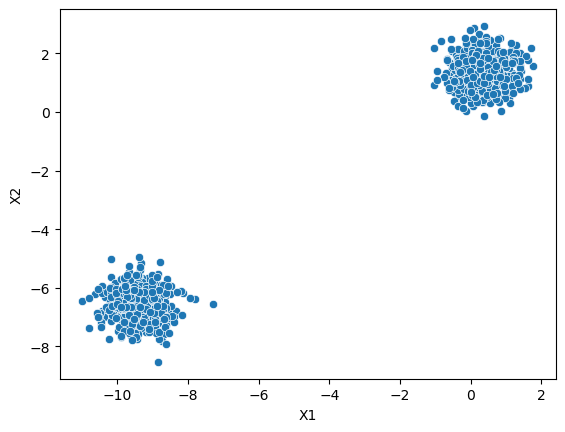

In [66]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')

<Axes: xlabel='X1', ylabel='X2'>

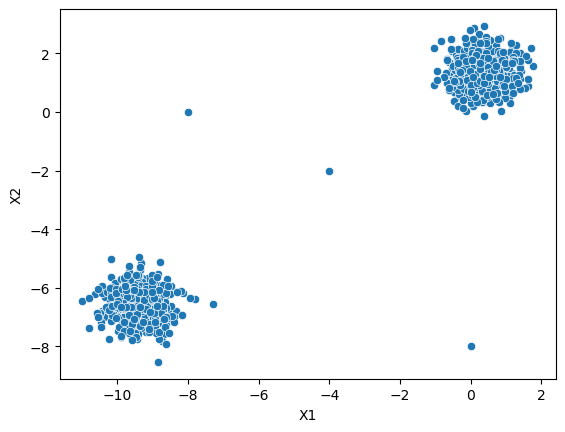

In [68]:
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2')

In [70]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

In [72]:
from sklearn.cluster import DBSCAN

In [85]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |
 |  The worst case memory complexity of DBSCAN is :math:`O({n}^2)`, which can
 |  occur when the `eps` param is large and `min_samples` is low.
 |
 |  Read more in the :ref:`User Guide <dbscan>`.
 |
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. Th

In [87]:
dbscan = DBSCAN()

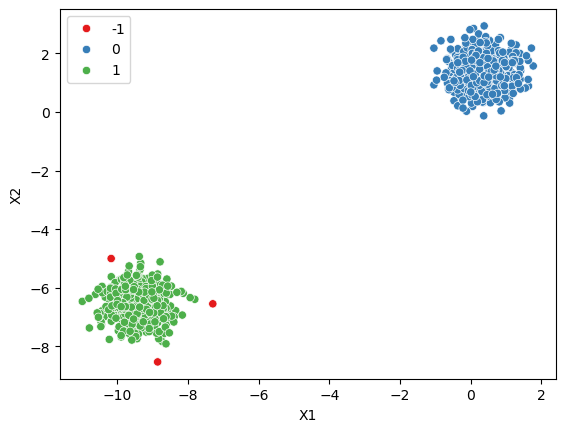

In [89]:
display_categories(dbscan,two_blobs)

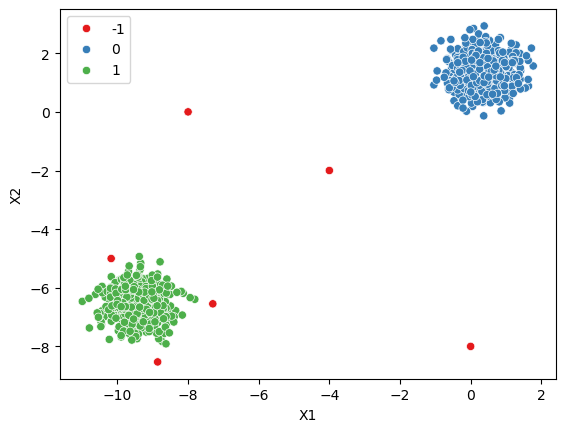

In [91]:
display_categories(dbscan,two_blobs_outliers)

### Epsilon: by default, value = 0.5

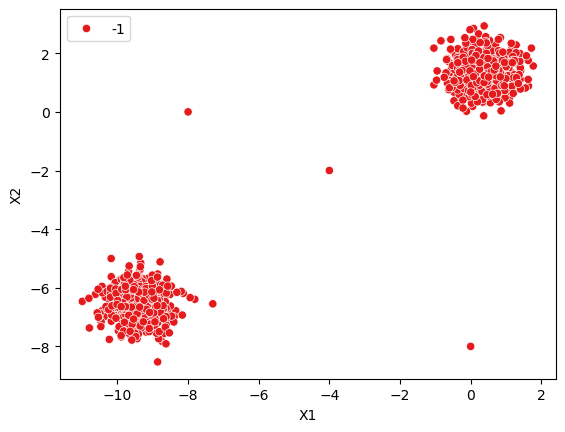

In [107]:
dbscan = DBSCAN(eps=0.001)
display_categories(dbscan,two_blobs_outliers)

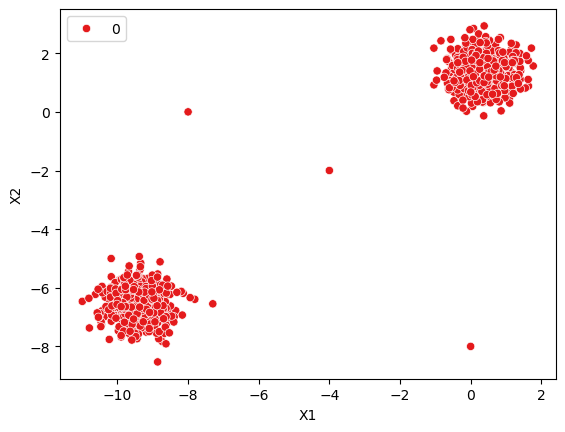

In [109]:
dbscan = DBSCAN(eps=10)
display_categories(dbscan,two_blobs_outliers)

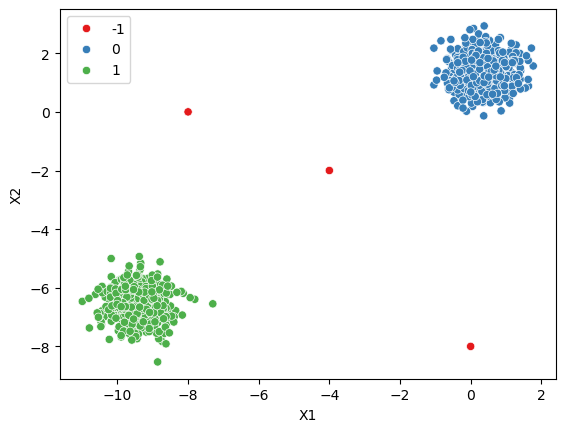

In [111]:
dbscan = DBSCAN(eps=1)
display_categories(dbscan,two_blobs_outliers)

In [115]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1])

In [117]:
dbscan.labels_ == -1

array([False, False, False, ...,  True,  True,  True])

In [119]:
np.sum(dbscan.labels_ == -1)

3

In [127]:
100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

0.29910269192422734

### Charting reasonable Epsilon values

In [130]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,10,100):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    # Log Number of Outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

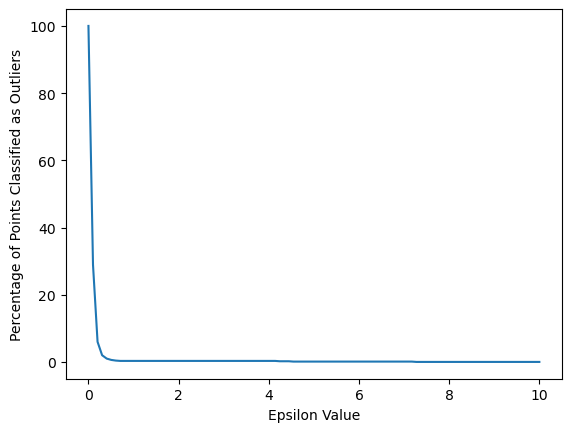

In [132]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

[None]

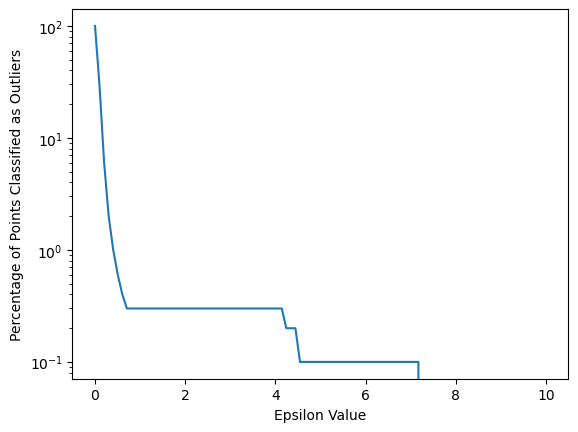

In [134]:
a = sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
a.set(yscale='log')

[None]

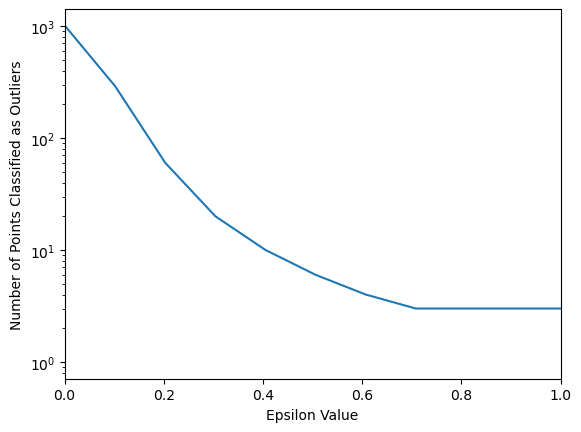

In [136]:
a = sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(0,1)
a.set(yscale='log')

### Do we want to think in terms of percentage targeting instead? If so, you could "target" a percentage, like choose a range producing 1%-5% as outliers.

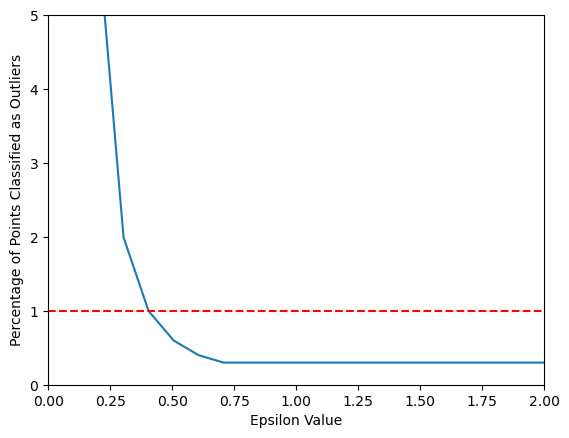

In [141]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,5)
plt.xlim(0,2)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--')

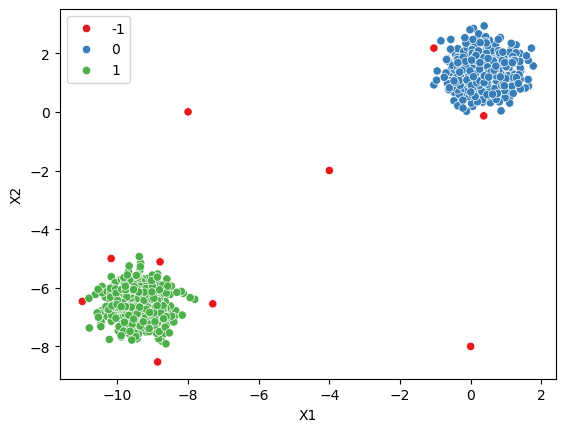

In [147]:
dbscan = DBSCAN(eps=0.4)
display_categories(dbscan,two_blobs_outliers)

### Do we want to think in terms of number of outliers targeting instead? If so, you could "target" a number of outliers, such as 3 points as outliers.

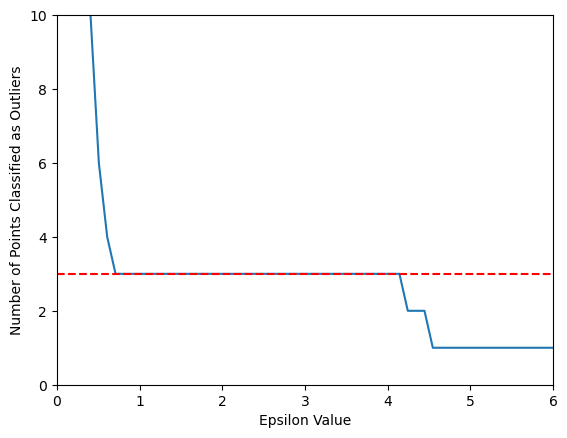

In [166]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,10)
plt.xlim(0,6)
plt.hlines(y=3,xmin=0,xmax=10,colors='red',ls='--')

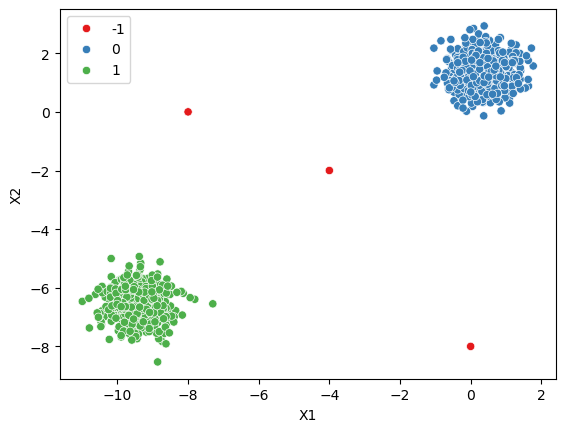

In [168]:
dbscan = DBSCAN(eps=0.75)
display_categories(dbscan,two_blobs_outliers)

### Minimum samples: by default, the value is 5.

In [174]:
outlier_percent = []

for n in np.arange(1,100):
    
    # Create Model
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Minimum Number of Samples')

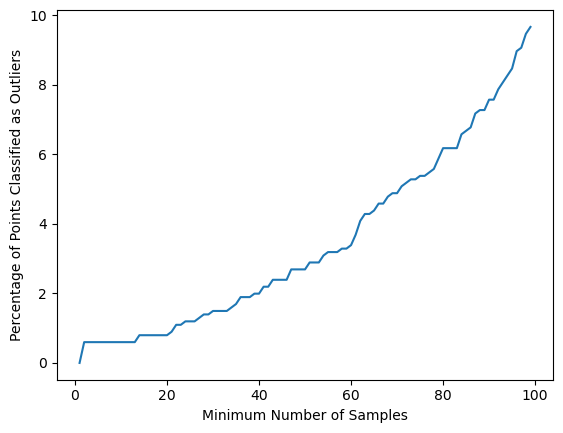

In [176]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Minimum Number of Samples")

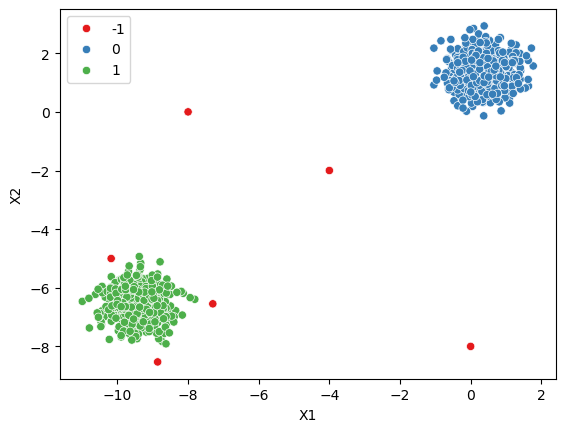

In [178]:
num_dim = two_blobs_outliers.shape[1] #number of dimensions of the data

dbscan = DBSCAN(min_samples=2*num_dim)
display_categories(dbscan,two_blobs_outliers)

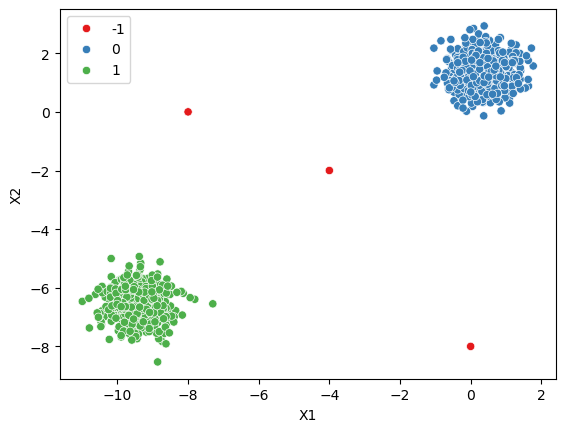

In [180]:
num_dim = two_blobs_outliers.shape[1]

dbscan = DBSCAN(eps=0.75,min_samples=2*num_dim)
display_categories(dbscan,two_blobs_outliers)

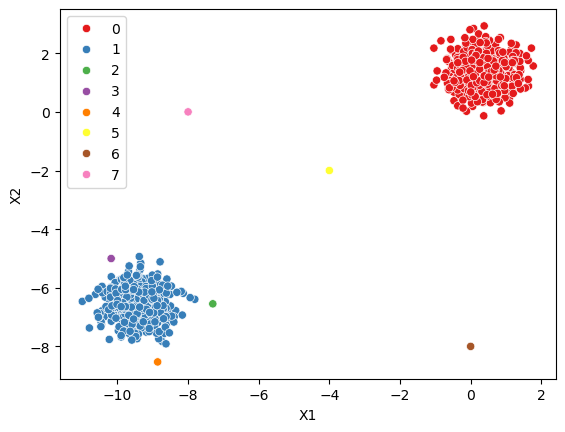

In [182]:
dbscan = DBSCAN(min_samples=1)
display_categories(dbscan,two_blobs_outliers)

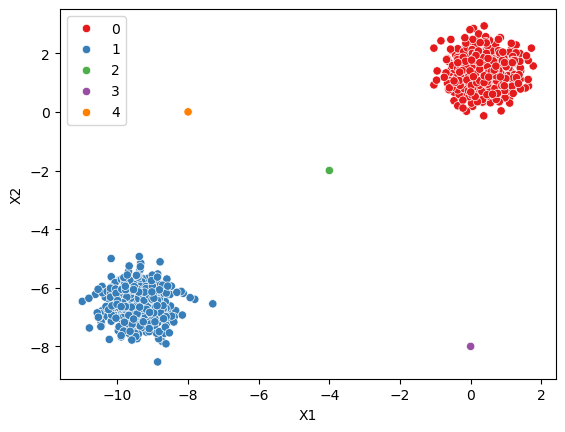

In [184]:
dbscan = DBSCAN(eps=0.75,min_samples=1)
display_categories(dbscan,two_blobs_outliers)